In [10]:
from ipywidgets import interact
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pylab as plt

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, ColumnDataSource
import bokeh.palettes as bkpal

output_notebook()

Loading BokehJS ...

In [11]:
p = .7
y = np.asarray([0, 0, 0, 0, 1, 1])

prob = [p if y_ == 1 else (1-p) for y_ in y]
prob = np.cumprod(prob)
prob

array([0.3     , 0.09    , 0.027   , 0.0081  , 0.00567 , 0.003969])

In [12]:
prob2 = np.cumprod(st.bernoulli.pmf(y, p))
prob2

array([0.3     , 0.09    , 0.027   , 0.0081  , 0.00567 , 0.003969])

In [13]:
np.log(prob2[-1])

-5.5292411051812085

In [14]:
np.cumsum(np.log(st.bernoulli.pmf(y, p)))

array([-1.2039728 , -2.40794561, -3.61191841, -4.81589122, -5.17256616,
       -5.52924111])

In [15]:
st.bernoulli.logpmf(y, p).cumsum()

array([-1.2039728 , -2.40794561, -3.61191841, -4.81589122, -5.17256616,
       -5.52924111])

In [16]:
st.binom.logpmf(y.sum(), len(y), p)

-2.8211909040789984

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


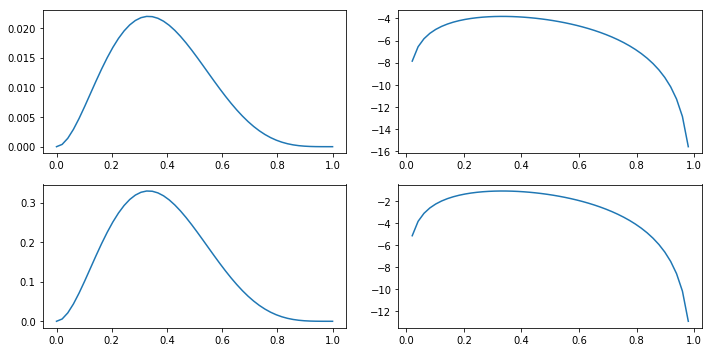

In [17]:
pv = np.linspace(0., 1., 50)
like1 = np.zeros_like(pv)
for i, p in enumerate(pv):
    like1[i] = st.bernoulli.pmf(y, p).prod()
like2 = st.binom.pmf(y.sum(), len(y), pv)

_, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].plot(pv, like1)
ax[0, 1].plot(pv, np.log(like1))
ax[1, 0].plot(pv, like2)
ax[1, 1].plot(pv, np.log(like2))
plt.tight_layout();

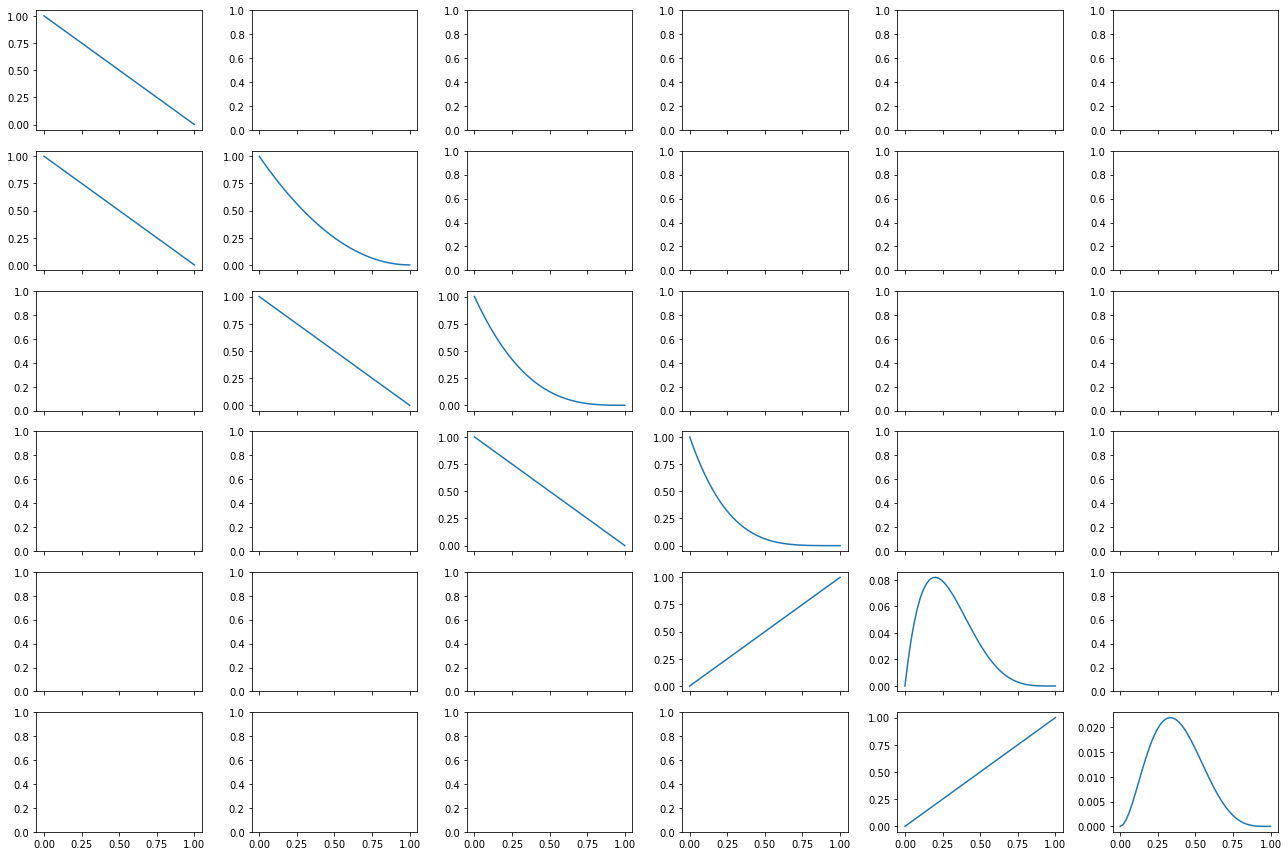

In [18]:
_, ax = plt.subplots(len(y), len(y), figsize=(len(y)*3, len(y)*2), sharex=True)
j = 0
for i, y_ in enumerate(y):
    likei = st.bernoulli.pmf(y_, pv)
    ax[i, j].plot(pv, likei)
    if i>0:
        like_ *= likei
        ax[i, j+1].plot(pv, like_)
        j+=1
    else:
        like_ = likei
    
plt.tight_layout();

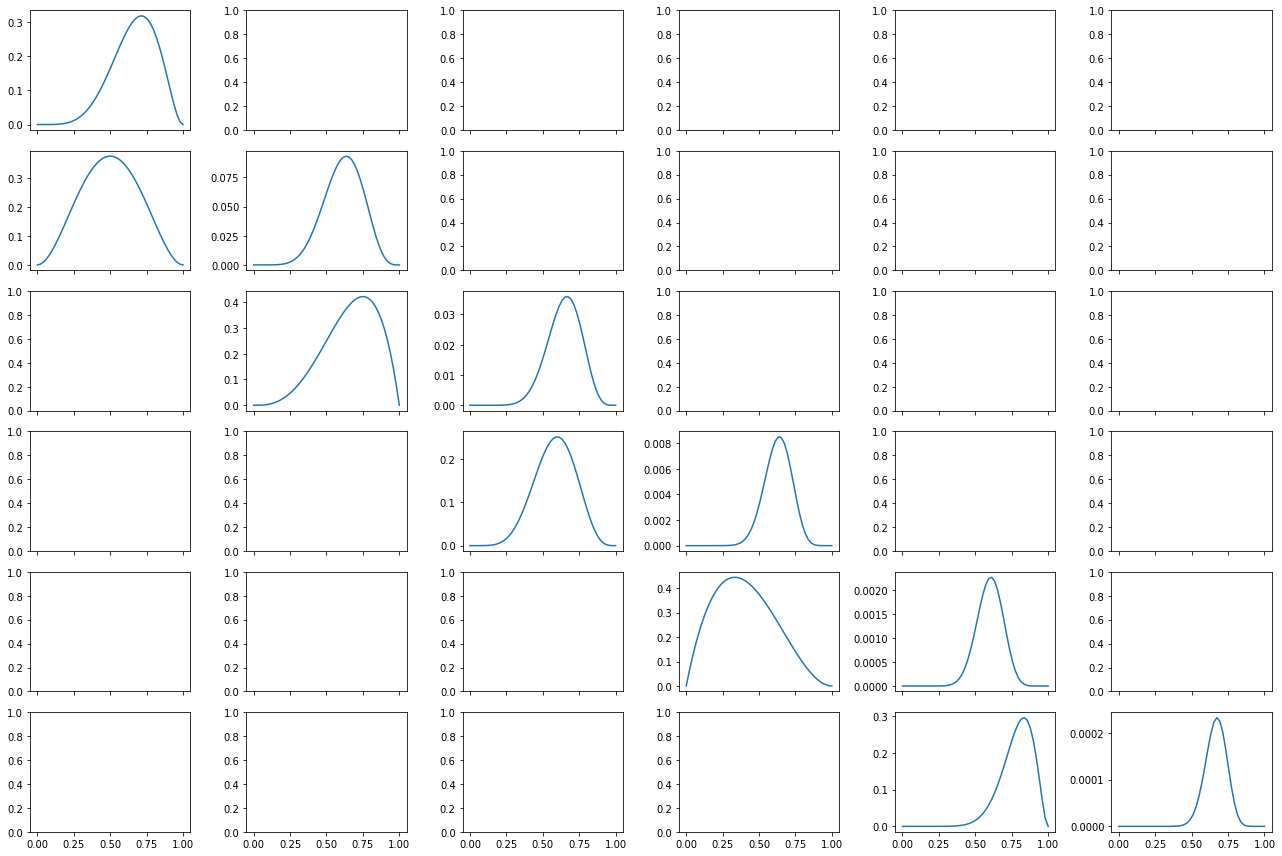

In [19]:
y = np.asarray([5, 2, 3, 6, 1, 10])
n = np.asarray([7, 4, 4, 10, 3, 12])

_, ax = plt.subplots(len(y), len(y), figsize=(
    len(y) * 3, len(y) * 2), sharex=True)
j = 0
for i in range(len(y)):
    likei = st.binom.pmf(y[i], n[i], pv)
    ax[i, j].plot(pv, likei)
    if i > 0:
        like_ *= likei
        ax[i, j + 1].plot(pv, like_)
        j += 1
    else:
        like_ = likei

plt.tight_layout()

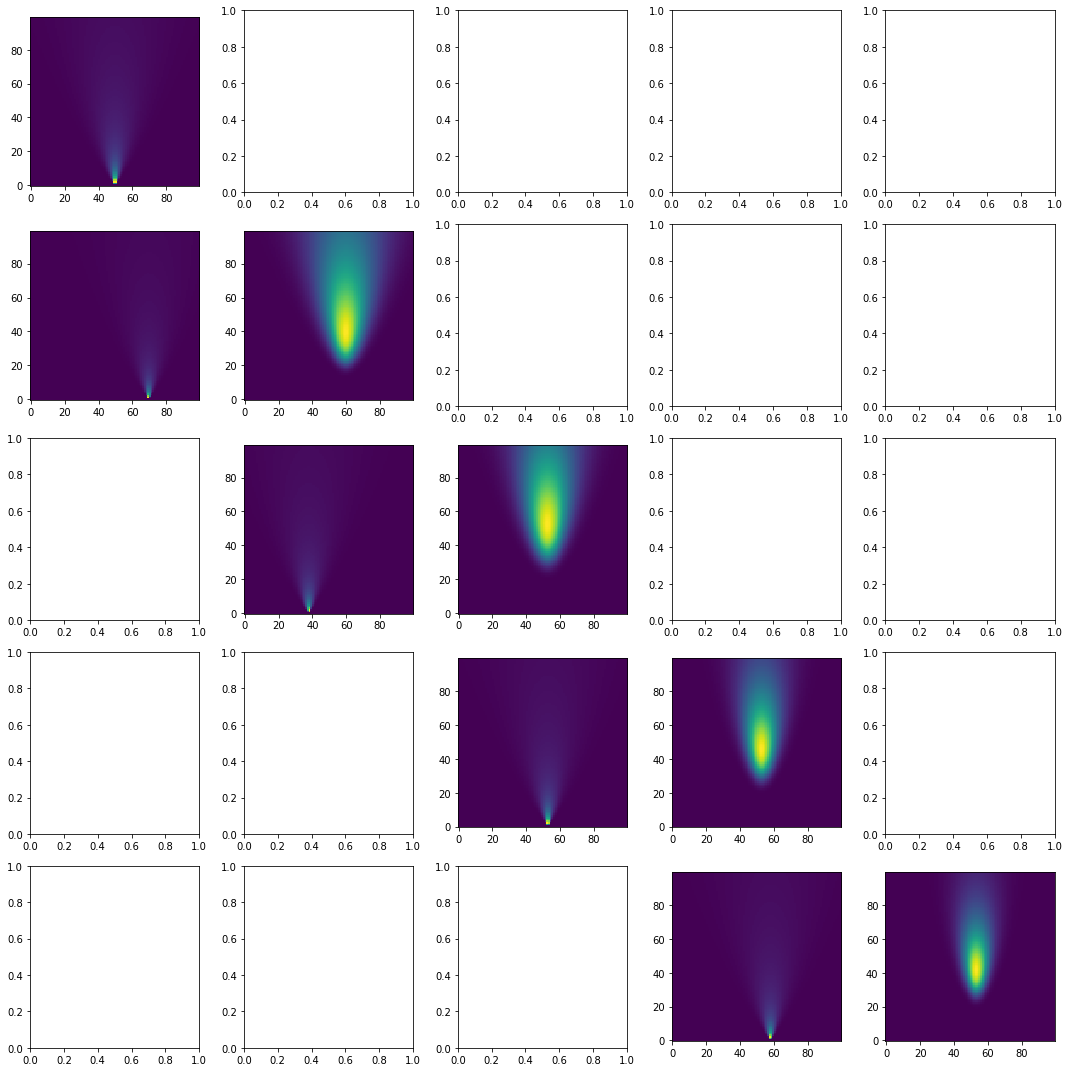

In [20]:
y = np.asarray([0., 2., -1.2, 0.3, .8])
muv2 = np.linspace(-5., 5., 100)
sdv2 = np.linspace(0.001, 2.5, 100)
muv2_, sdv2_ = np.meshgrid(muv2, sdv2)

_, ax = plt.subplots(len(y), len(y), figsize=(
    len(y) * 3, len(y) * 3))
j = 0
for i, obs in enumerate(y):
    likei = st.norm.pdf(obs, muv2_, sdv2_)
    ax[i, j].imshow(likei, origin='lower')
    if i > 0:
        like_ *= likei
        ax[i, j + 1].imshow(like_, origin='lower')
        j += 1
    else:
        like_ = likei

plt.tight_layout();

$\pi(y \mid \theta) = f(y, \theta)$  
$P(y \cap \theta) = P(y \mid \theta)P(\theta)$

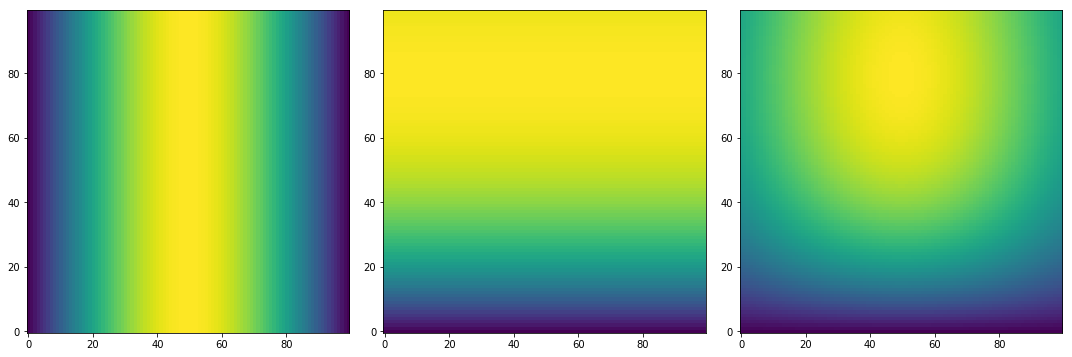

In [21]:
obs = 3.
muv = np.linspace(-5., 5., 100)
sdv = np.linspace(0.001, 2.5, 100)
muv_, sdv_ = np.meshgrid(muv, sdv)
mu_prior = st.norm.pdf(muv_, 0, 5)
sd_prior = st.gamma.pdf(sdv_, 2., scale=1.0 / .5)

_, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(mu_prior, origin='lower')
ax[1].imshow(sd_prior, origin='lower')
prior = mu_prior*sd_prior
ax[2].imshow(prior, origin='lower')
plt.tight_layout()
plt.show()

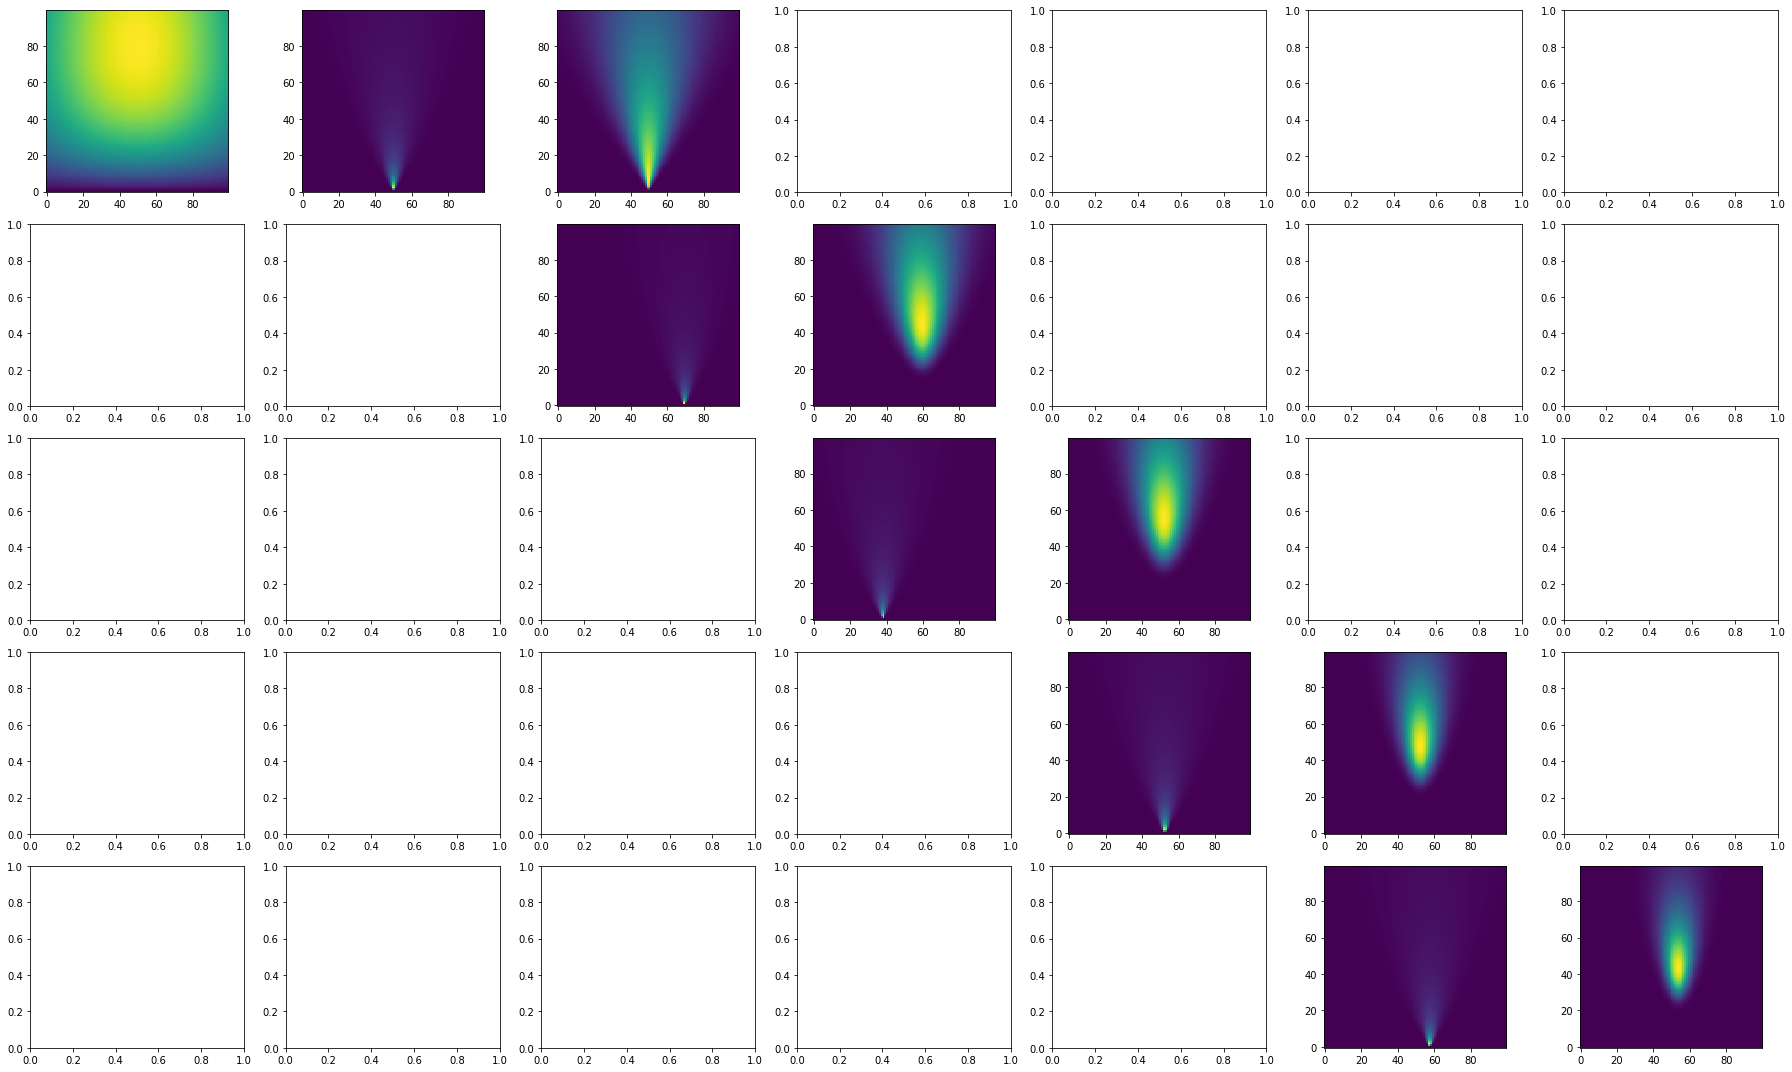

In [22]:
_, ax = plt.subplots(len(y), len(y)+2, figsize=(
    len(y) * 5, len(y) * 3))
j = 0
like_ = np.copy(prior)
ax[0, 0].imshow(like_, origin='lower')
for i, obs in enumerate(y):
    likei = st.norm.pdf(obs, muv2_, sdv2_)
    ax[i, j+1].imshow(likei, origin='lower')
    like_ *= likei
    ax[i, j + 2].imshow(like_, origin='lower')
    j += 1

plt.tight_layout();

In [23]:
ll_ = st.norm.pdf(obs, muv_, sdv_)
ll = ll_*prior
df2 = pd.DataFrame(dict(likelihood=ll.flatten(), mu=muv_.flatten(), sd=sdv_.flatten()))
colors = bkpal.viridis(100)
lower_ll, upper_ll = np.percentile(ll.flatten(), [1, 99])
mapper = LinearColorMapper(palette=colors, low=lower_ll, high=upper_ll)
source2 = ColumnDataSource(df2)

In [24]:
from bokeh.models import HoverTool

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
fig5 = figure(
    title="Likelihood of mu and sigma in Gaussian",
    plot_height=500,
    plot_width=500,
    tools=TOOLS, toolbar_location='below')

fig5.grid.grid_line_color = None
fig5.axis.axis_line_color = None
fig5.axis.major_tick_line_color = None
fig5.axis.major_label_text_font_size = "5pt"
fig5.axis.major_label_standoff = 0

ax5 = fig5.rect(
    'mu',
    'sd',
    width=(muv[1]-muv[0]) * .99,
    height=(sdv[1]-sdv[0]) * .99,
    source=source2,
    fill_color={'field': 'likelihood',
                'transform': mapper},
    line_color=None)

fig5.select_one(HoverTool).tooltips = [
    ('mu', '@mu'),
    ('sd', '@sd'),
    ('like', '@likelihood'),
]

In [25]:
def update5(obs=2.5):
    ll_ = st.norm.pdf(obs, muv_, sdv_)
    ll = ll_*prior
    ax5.data_source.data['likelihood'] = ll.flatten()

    push_notebook()

In [26]:
show(fig5, notebook_handle=True)
interact(update5, obs=(-10, 10, .01));

interactive(children=(FloatSlider(value=2.5, description='obs', max=10.0, min=-10.0, step=0.01), Output()), _dom_classes=('widget-interact',))

In [34]:
import numpy as np
import pymc3 as pm
import seaborn as sns
import scipy.stats as st
%matplotlib inline

nmax = 25
k, n = 7, 10
pv = np.linspace(0., 1., 50)
nv = np.arange(50)
pv_, nv_ = np.meshgrid(pv, nv)
ll = st.binom.pmf(k, nv_, pv_)

In [38]:
with pm.Model() as m:
    n = pm.DiscreteUniform('n', 0, 25)
    p = pm.Uniform('p', 0., 1., transform=None)
    y = pm.Binomial('k', n, p, observed=7)

In [39]:
m

In [40]:
point = m.test_point
point

{'n': array(12), 'p': array(0.5)}

In [35]:
logp_m = m.logp
logp_y = y.logp

In [36]:
logp_m

In [22]:
ll2 = np.zeros_like(ll)
lly = ll2.flatten()
llm = np.zeros_like(lly)

for i in range(len(lly)):
    point['n'] = nv_.flatten()[i]
    point['p'] = pv_.flatten()[i]
    llm[i] = np.exp(logp_m(point))
    lly[i] = np.exp(logp_y(point))
llm = llm.reshape(nv_.shape)
lly = lly.reshape(nv_.shape)

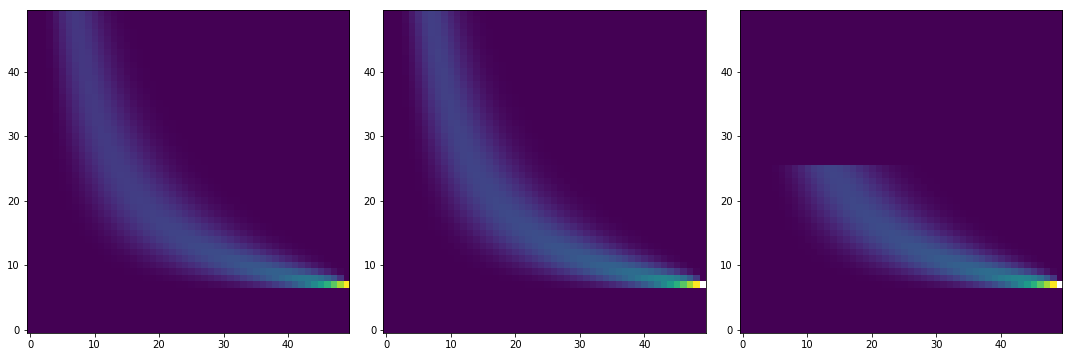

In [23]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
ll = st.binom.pmf(7, nv_, pv_)
ax[0].imshow(ll, origin='lower')
ax[1].imshow(lly, origin='lower')
ax[2].imshow(llm, origin='lower')
plt.tight_layout()
plt.show()

In [43]:
np.exp(n.logp(point))

0.03846153846153846

In [45]:
1/26

0.038461538461538464

$f\colon \mathbb{R} \times \mathbb{N} \to \mathbb{R}$

In [52]:
m.basic_RVs

[n, p, k]

In [48]:
n.distribution.logp

<bound method DiscreteUniform.logp of <pymc3.distributions.discrete.DiscreteUniform object at 0x125ac6358>>

In [47]:
n.logpt

__logp_n

In [51]:
m.logpt??

In [24]:
with pm.Model() as m2:
    n = pm.Uniform('n', 0, nmax)
    p = pm.Uniform('p', 0., 1.)
    y = pm.Binomial('k', n, p, observed=7)
#     tr = pm.sample(10000, tune=5000)
    tr = pm.sample(10000, step=pm.Metropolis())

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_interval__]
>Metropolis: [n_interval__]
100%|██████████| 10500/10500 [00:04<00:00, 2300.24it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '76728' (I am process '76872')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/jlao/.theano/compiledir_Darwin-17.5.0-x86_64-i386-64bit-i386-3.5.1-64/lock_dir
The number of effective samples is smaller than 10% for some parameters.


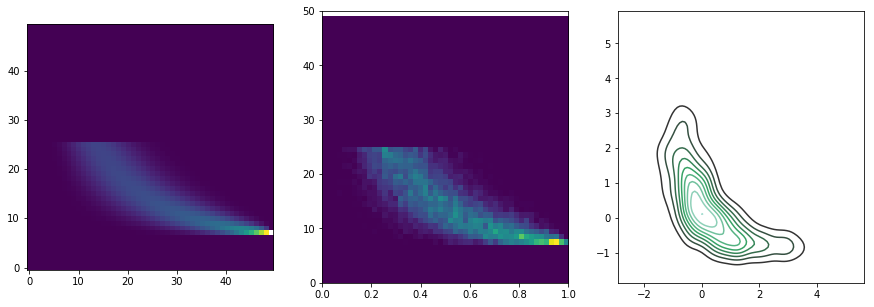

In [25]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax[0].plot(tr['p'], tr['n'], 'o', color='r', alpha=.05)
ax[0].imshow(llm, origin='lower')
ax[1].hist2d(tr['p'], tr['n'], bins=[pv, nv])
ax[1].set_ylim(0, 50)
sns.kdeplot(tr['p_interval__'][:1000], tr['n_interval__'][:1000], ax=ax[2]);